In [1]:
import torch
import argparse
import torch.nn as nn
import os.path as osp
import torch.utils.data
import torch.optim as optim
from torchvision import transforms
from torch.autograd import Variable
from loader import TransientObjectLoader
from super_res import Net

% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
test_loader = torch.utils.data.DataLoader(
    TransientObjectLoader('../../new_stamps', train=False,
                          transform=transforms.ToTensor()),
    batch_size=1000, shuffle=True)

model = Net(1)
with open('model_res.pt', 'rb') as f:
    state_dict = torch.load(f)
    model.load_state_dict(state_dict)

model.cuda()

Net (
  (relu): ReLU ()
  (conv1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pixel_shuffle): PixelShuffle (upscale_factor=1)
)

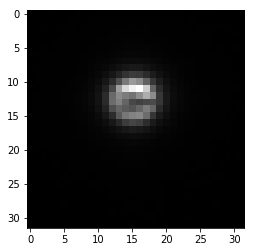

In [37]:
img = test_loader.dataset[1000]
plt.imshow(img.view(32, 32).numpy(), cmap='gray')

In [38]:
img = Variable(img.view(1, 1, 32, 32))
img = img.cuda()
out = model(img)
 
x = model.relu(model.conv1(img))
x = model.relu(model.conv2(x))
model.relu(model.conv3(x)).size()

torch.Size([1, 32, 32, 32])

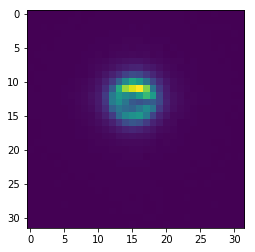

In [36]:
plt.imshow(out.cpu().data.view(32, 32).numpy())